In [1]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

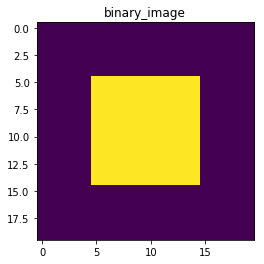

In [2]:
binary_image = np.zeros((20,20), dtype=np.int)
binary_image[5:15, 5:15] = 1
plt.imshow(binary_image)
plt.title('binary_image')
plt.show()

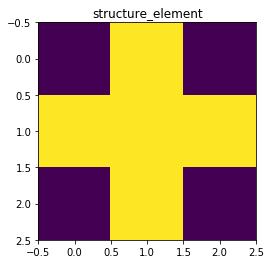

In [3]:
structure_element = ndimage.generate_binary_structure(2, 1)
plt.imshow(structure_element)
plt.title('structure_element')
plt.show()

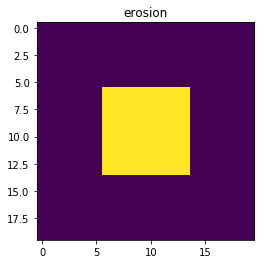

In [4]:
erosion = ndimage.binary_erosion(binary_image, structure_element)
plt.imshow(erosion)
plt.title('erosion')
plt.show()

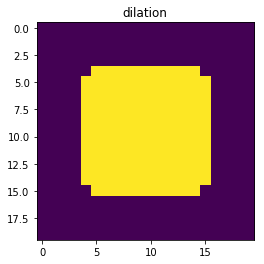

In [5]:
dilation = ndimage.binary_dilation(binary_image, structure_element)
plt.imshow(dilation)
plt.title('dilation')
plt.show()

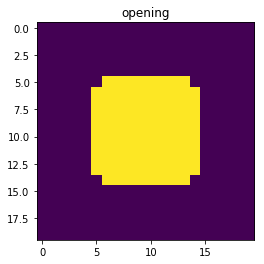

In [6]:
opening = ndimage.binary_opening(binary_image, structure_element)
plt.imshow(opening)
plt.title('opening')
plt.show()

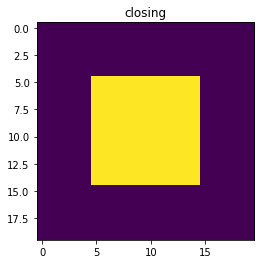

In [7]:
closing = ndimage.binary_closing(binary_image, structure_element)
plt.imshow(closing)
plt.title('closing')
plt.show()

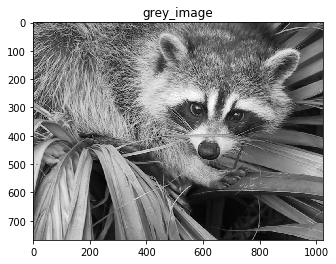

In [8]:
grey_image = misc.face(gray=True)
plt.imshow(grey_image, cmap=plt.cm.gray)
plt.title('grey_image')
plt.show()

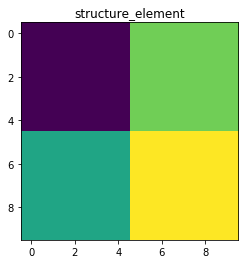

In [9]:
structure_element = np.ones((10, 10))
structure_element[0:5, 0:5] = 0
structure_element[5:10, 0:5] = 150
structure_element[0:5, 5:10] = 200
structure_element[5:10, 5:10] = 255
plt.imshow(structure_element)
plt.title('structure_element')
plt.show()

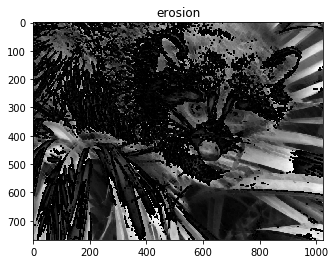

In [10]:
grey_erosion = ndimage.grey_erosion(grey_image, size=(10, 10), structure = structure_element)
plt.imshow(grey_erosion, cmap=plt.cm.gray)
plt.title('erosion')
plt.show()

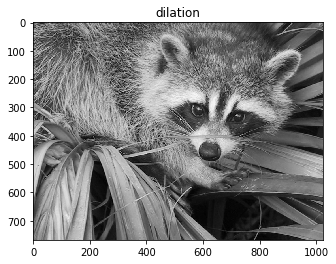

In [11]:
grey_erosion = ndimage.grey_dilation(grey_image, size=(10, 10), structure = structure_element)
plt.imshow(grey_erosion, cmap=plt.cm.gray)
plt.title('dilation')
plt.show()

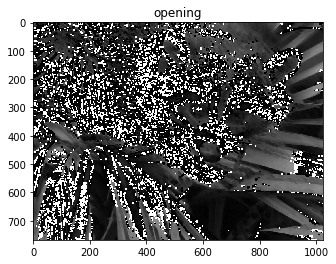

In [12]:
grey_erosion = ndimage.grey_opening(grey_image, size=(10, 10), structure = structure_element)
plt.imshow(grey_erosion, cmap=plt.cm.gray)
plt.title('opening')
plt.show()

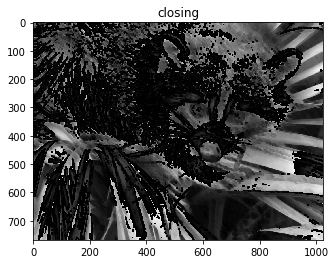

In [13]:
grey_erosion = ndimage.grey_closing(grey_image, size=(10, 10), structure = structure_element)
plt.imshow(grey_erosion, cmap=plt.cm.gray)
plt.title('closing')
plt.show()

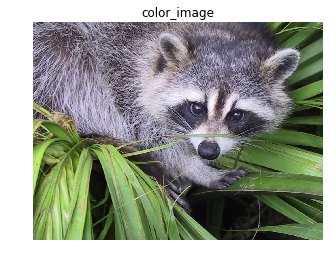

In [57]:
structure_element = ndimage.generate_binary_structure(2, 1)
color_image = misc.face()
plt.imshow(color_image)
plt.axis('off')
plt.title('color_image')
plt.show()

In [82]:
def color_erosion(image, structure):
    lab = color.rgb2lab(image)
    a = color_image[:,:,1]
    b = color_image[:,:,2]
    a = ndimage.grey_erosion(a, size=(10, 10), structure = structure)
    b = ndimage.grey_erosion(b, size=(10, 10), structure = structure)
    lab[:,:,1] = a
    lab[:,:,2] = b
    rgb = color.lab2rgb(lab)
    return rgb

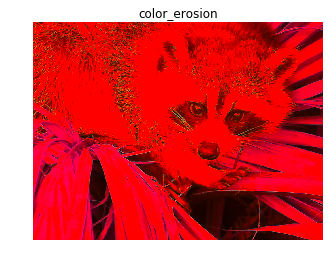

In [83]:
erosion = color_erosion(color_image, structure_element)
plt.imshow(erosion)
plt.axis('off')
plt.title('color_erosion')
plt.show()

In [93]:
def color_dilation(image, structure):
    lab = color.rgb2lab(image)
    a = color_image[:,:,1]
    b = color_image[:,:,2]
    a = ndimage.grey_dilation(a, size=(10, 10), structure = structure)
    b = ndimage.grey_dilation(b, size=(10, 10), structure = structure)
    lab[:,:,1] = a
    lab[:,:,2] = b
    rgb = color.lab2rgb(lab)
    return rgb

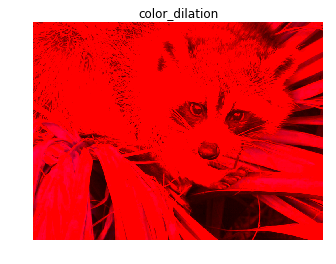

In [94]:
dilation = color_dilation(color_image, structure_element)
plt.imshow(dilation)
plt.axis('off')
plt.title('color_dilation')
plt.show()

In [102]:
def color_opening(image, structure):
    erosion = color_erosion(image, structure)
    opening = color_dilation(erosion, structure)
    return opening


def color_closing(image, structure):
    dilation = color_dilation(image, structure)
    closing = color_erosion(dilation, structure)
    return closing


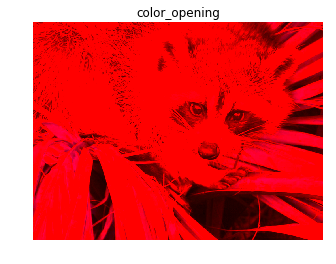

In [99]:
opening = color_opening(color_image, structure_element)
plt.imshow(opening)
plt.axis('off')
plt.title('color_opening')
plt.show()

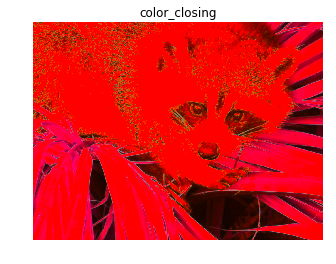

In [101]:
closing = color_closing(color_image, structure_element)
plt.imshow(closing)
plt.axis('off')
plt.title('color_closing')
plt.show()